In [133]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from joblib import dump

# Tree Visualisation
from sklearn.tree import export_graphviz, plot_tree
import graphviz

In [134]:
df = pd.read_csv("reverse.csv")
df.head()

,Date,Show,Keyword1,Keyword2,Keyword3,Keyword4,Keyword5,Keyword6,Keyword7,Keyword8,...,Keyword18,Keyword19,Keyword20,Keyword21,Keyword22,Keyword23,Average,Mean,Median,Quantile
0,2004-11,4,61,52,56,59,55,95,53,68,...,43,24,20,32,50,30,47.826087,low,low,low
1,2004-12,6,55,50,46,45,49,82,47,60,...,41,27,20,26,45,26,43.086957,low,low,low
2,2005-01,6,58,55,55,50,55,86,50,70,...,43,32,24,29,43,28,45.739130,low,low,low
3,2005-02,7,67,60,50,59,53,90,62,72,...,47,30,25,33,51,31,49.652174,low,low,low
4,2005-03,11,63,53,52,49,54,82,60,73,...,45,30,23,31,44,31,47.826087,low,low,low


In [135]:
df['Median'].value_counts()

Median
low     326
high    325
Name: count, dtype: int64

In [136]:
MedianDF = df
MedianDF = MedianDF.drop(columns=['Date', 'Show', 'Average', 'Mean', 'Quantile', 'Keyword6', 'Keyword23'])

In [137]:
MedianDF['Median'] = MedianDF['Median'].map({'low':0,'high':1})

X = MedianDF.drop('Median', axis=1)
y = MedianDF['Median']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [138]:
estx = 100
esty = 500
depx = 2
depy = 6
niter = 10
folds = 5

In [139]:
param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000189A7CF8B10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000189A7DC9090>})

In [140]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 111}


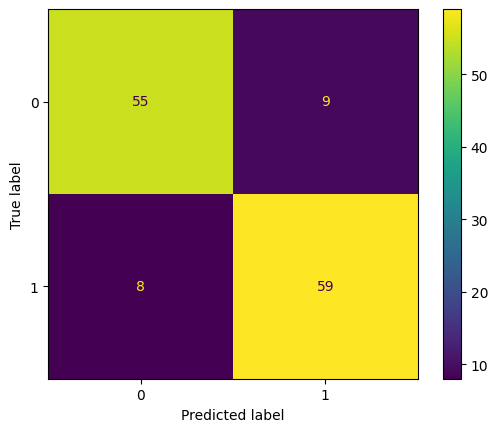

In [141]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [142]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8702290076335878
Precision: 0.8702290076335878
Recall: 0.8702290076335878



(process:17732): Pango-WARNING **: 22:24:41.260: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


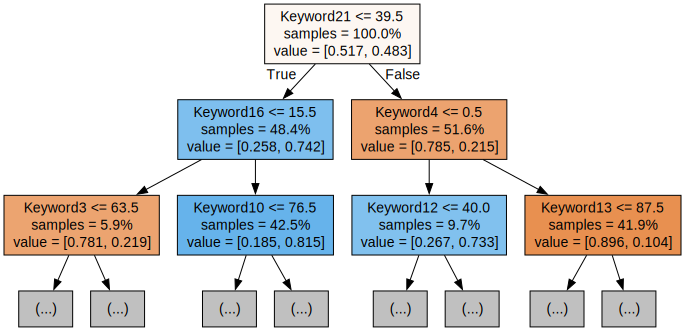


(process:19592): Pango-WARNING **: 22:24:41.929: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


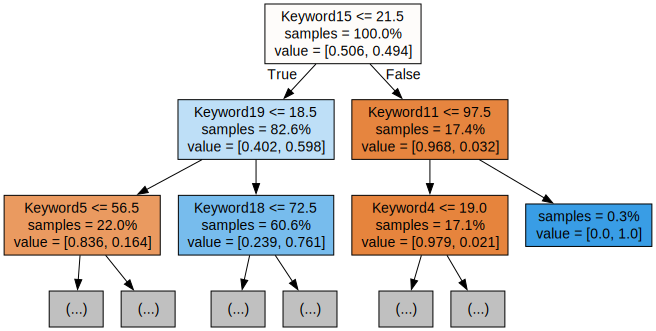


(process:24892): Pango-WARNING **: 22:24:42.621: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


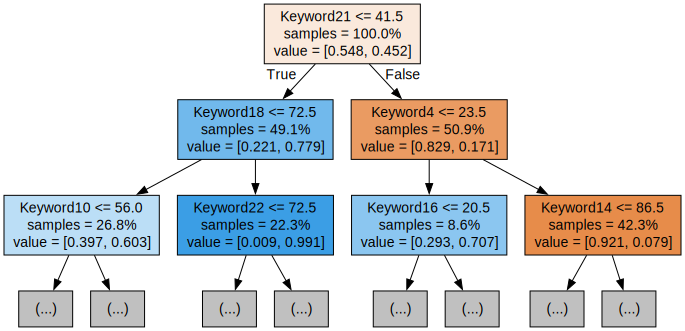

In [143]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

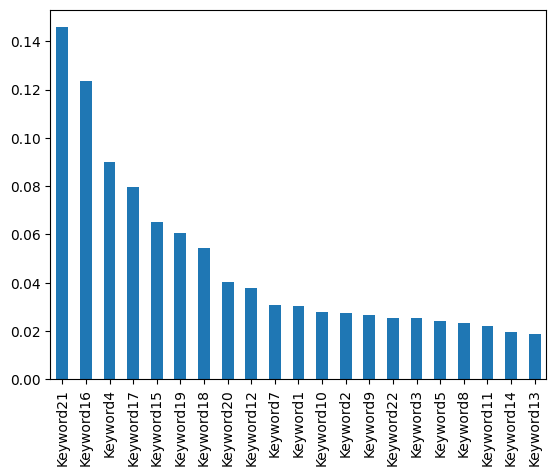

In [144]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

Best hyperparameters: {'max_depth': 5, 'n_estimators': 125}
Accuracy: 0.8787878787878788
Precision: 0.8787878787878788
Recall: 0.8787878787878788


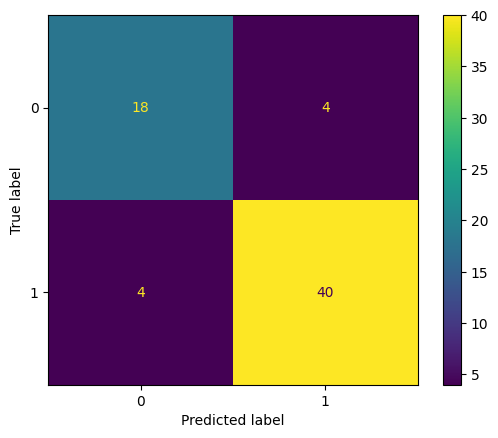

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
# Create a variable for the best model
best_rf2 = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
# Generate predictions with the best model
y_pred = best_rf2.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

In [146]:
#dump(best_rf,"reverseMedian.joblib")


(process:12240): Pango-WARNING **: 22:24:59.485: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


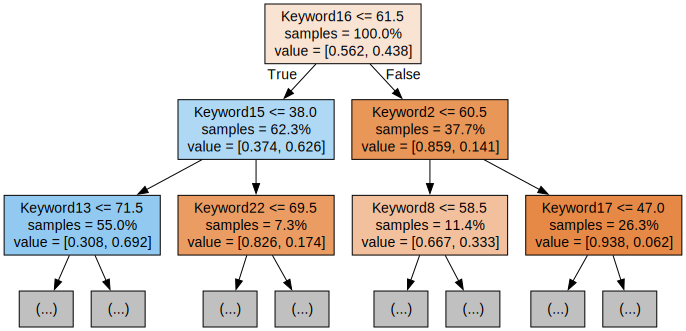


(process:24072): Pango-WARNING **: 22:25:00.082: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


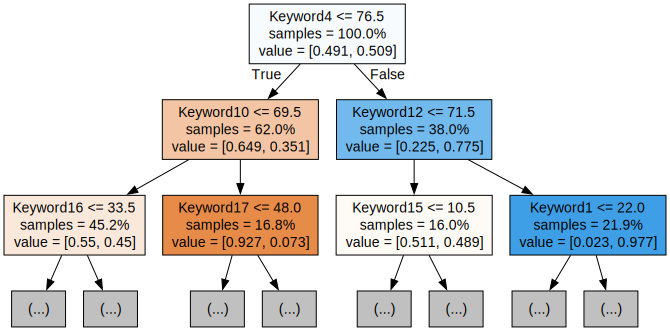


(process:11392): Pango-WARNING **: 22:25:00.697: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


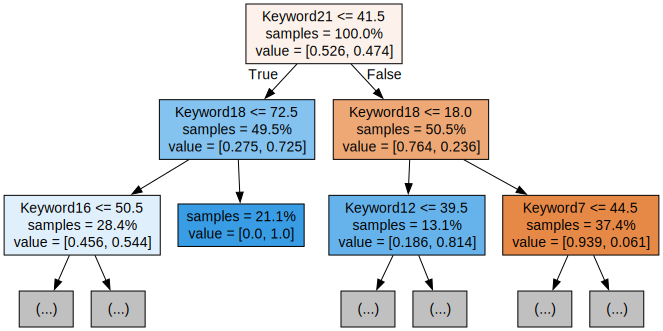

In [147]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf2.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 130}
Accuracy: 0.8622448979591837
Precision: 0.8622448979591837
Recall: 0.8622448979591837


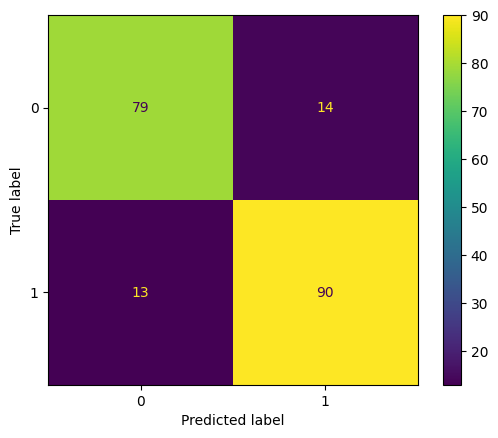

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
# Create a variable for the best model
best_rf3 = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
# Generate predictions with the best model
y_pred = best_rf3.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


(process:8240): Pango-WARNING **: 22:25:13.242: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


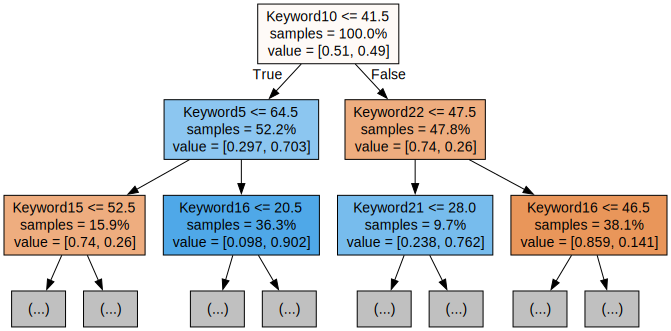


(process:11052): Pango-WARNING **: 22:25:13.845: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


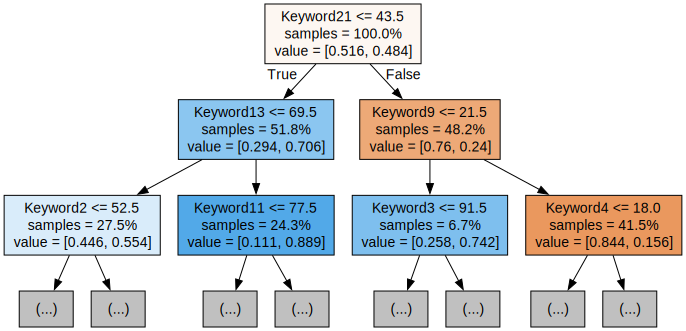


(process:11844): Pango-WARNING **: 22:25:14.438: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


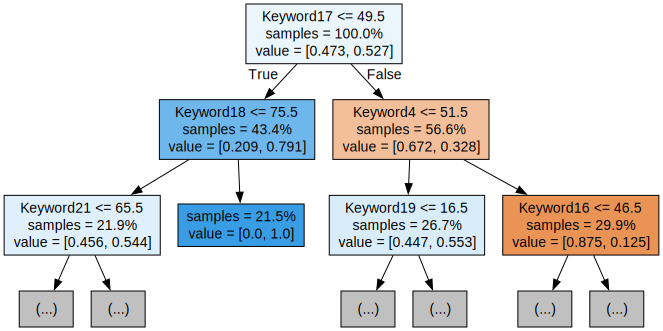

In [149]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf3.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 392}
Accuracy: 0.8697318007662835
Precision: 0.8697318007662835
Recall: 0.8697318007662835


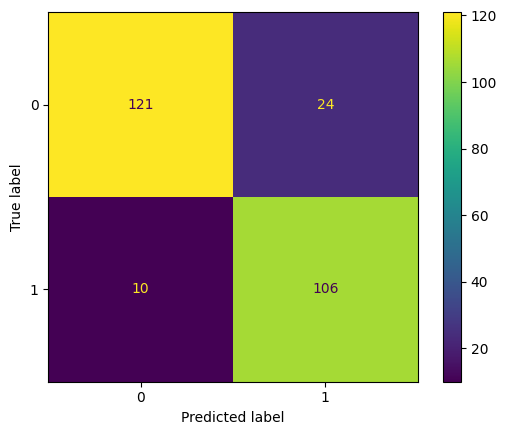

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)
param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
# Create a variable for the best model
best_rf4 = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
# Generate predictions with the best model
y_pred = best_rf4.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

In [151]:
#dump(best_rf4, 'reverseMedian2.joblib')


(process:22660): Pango-WARNING **: 22:25:28.498: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


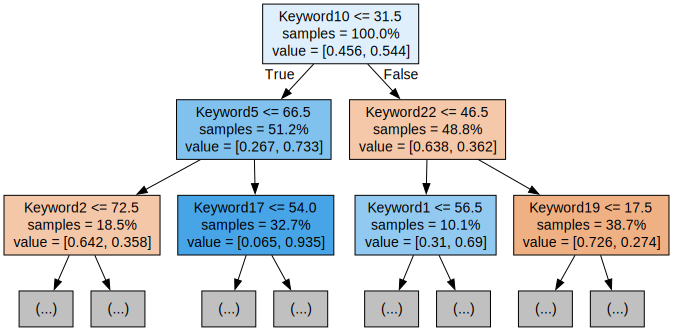


(process:12152): Pango-WARNING **: 22:25:29.096: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


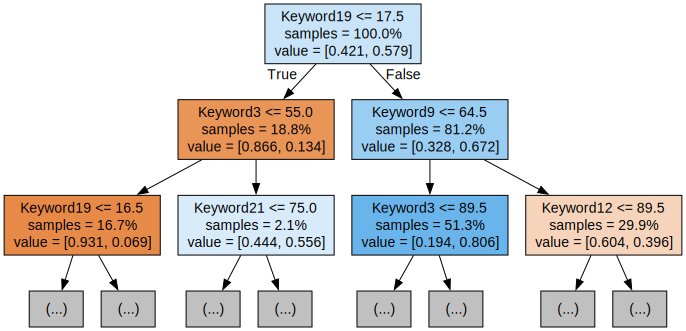


(process:21804): Pango-WARNING **: 22:25:29.782: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


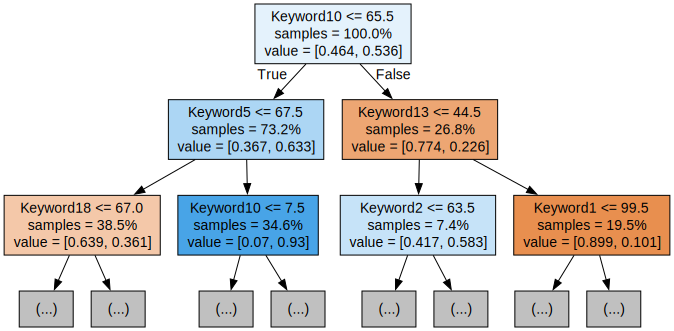

In [152]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf4.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 329}
Accuracy: 0.852760736196319
Precision: 0.852760736196319
Recall: 0.852760736196319


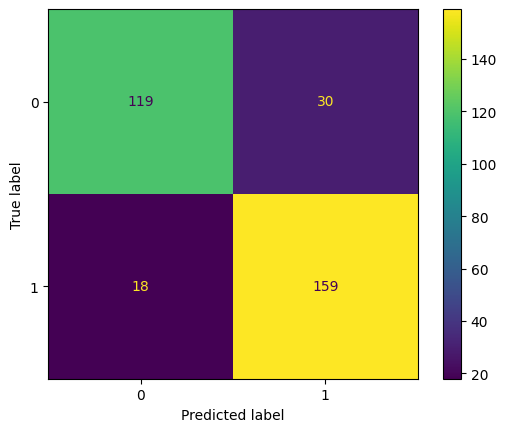

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
# Create a variable for the best model
best_rf5 = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
# Generate predictions with the best model
y_pred = best_rf5.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


(process:4612): Pango-WARNING **: 22:25:43.525: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


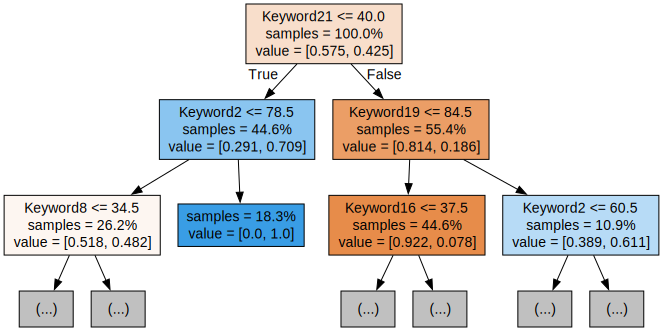


(process:3052): Pango-WARNING **: 22:25:44.110: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


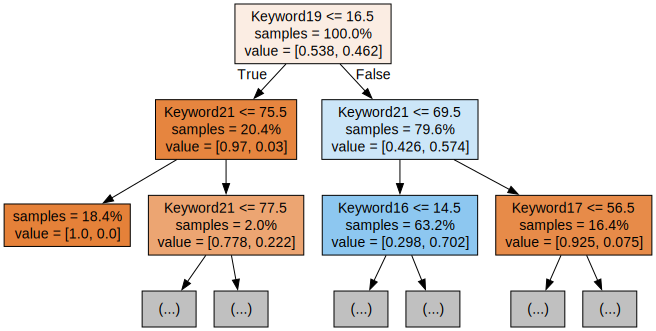


(process:23448): Pango-WARNING **: 22:25:44.703: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


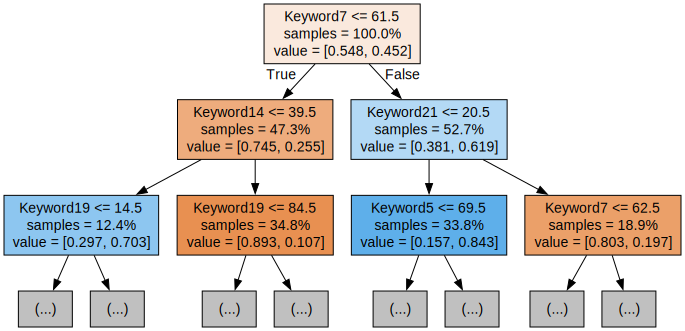

In [154]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf5.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)